In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix


In [2]:
# Load MNIST dataset from Keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# converting pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape to add channel dimension (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

#one-hot encodeding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


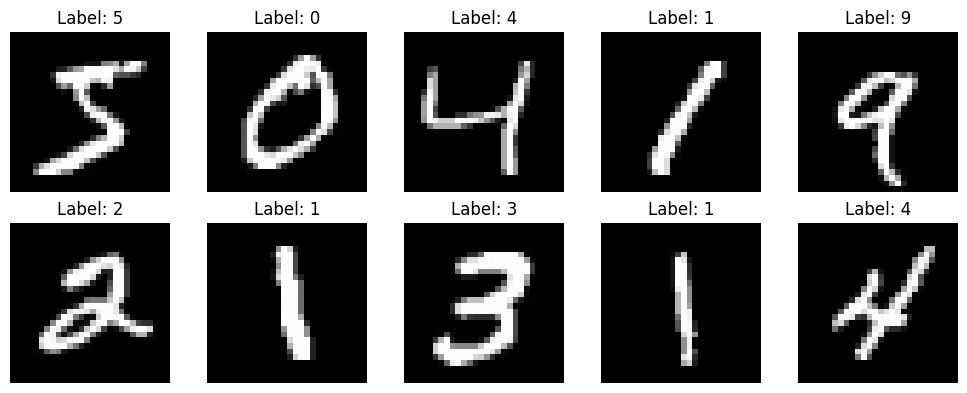

In [3]:
# Visualize a few sample digits
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [13]:
#Convulutional neural network architecture

model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=2),
    Conv2D(64, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for digits 0–9 (using softmax - multiclass classification)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#Training
history = model.fit(x_train, y_train_cat,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.7775 - loss: 0.6997 - val_accuracy: 0.9753 - val_loss: 0.0841
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.9629 - loss: 0.1250 - val_accuracy: 0.9827 - val_loss: 0.0592
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 105ms/step - accuracy: 0.9738 - loss: 0.0888 - val_accuracy: 0.9862 - val_loss: 0.0473
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.9791 - loss: 0.0691 - val_accuracy: 0.9890 - val_loss: 0.0407
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.9820 - loss: 0.0582 - val_accuracy: 0.9885 - val_loss: 0.0381
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.9845 - loss: 0.0502 - val_accuracy: 0.9884 - val_loss: 0.0380
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.9877 - loss: 0.0420 - val_accuracy: 0.9891 - val_loss: 0.0344
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.9870 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


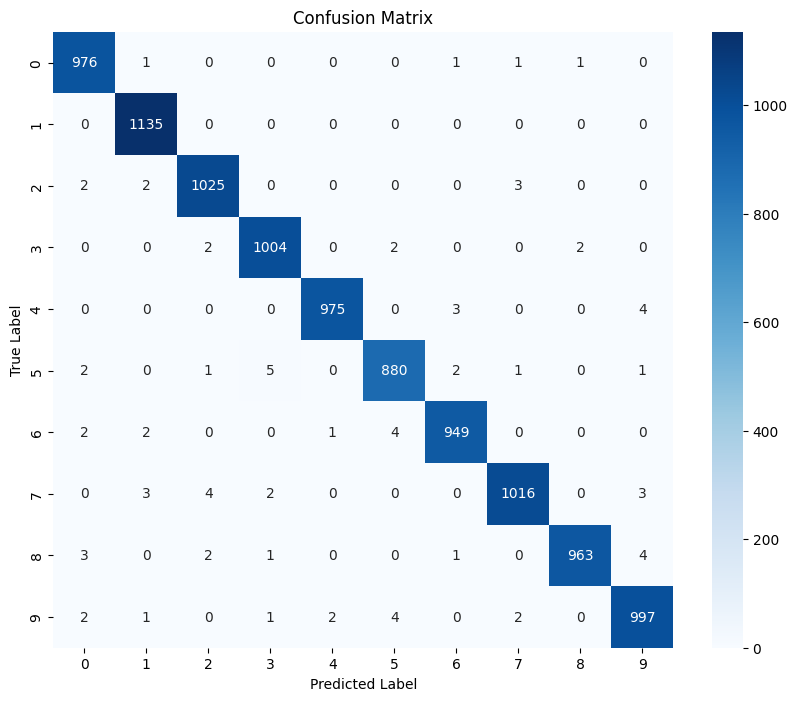

In [17]:
# Predict and convert predictions to class labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc * 100:.2f}%")



313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9904 - loss: 0.0269
Test Accuracy: 99.20%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


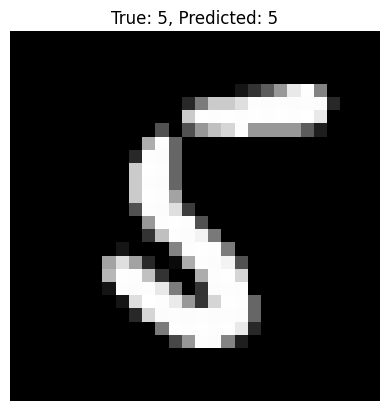

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


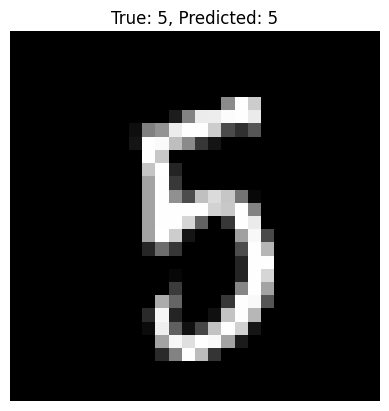

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


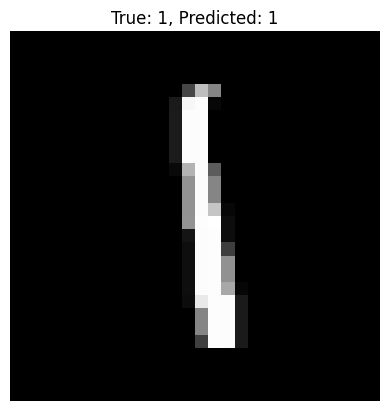

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


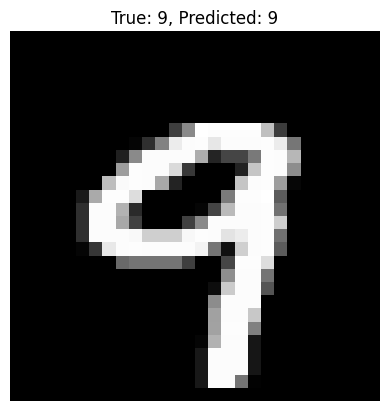

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


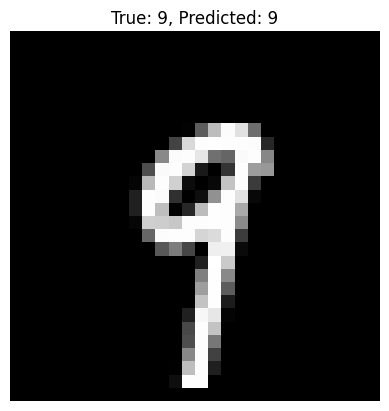

In [11]:
import numpy as np

# Pick a few random test samples
num_samples = 5
indices = np.random.choice(len(x_test), num_samples, replace=False)

for i in indices:
    img = x_test[i]
    label = y_test[i]

    # Predict
    pred = model.predict(np.expand_dims(img, axis=0))
    pred_label = np.argmax(pred)

    # Show the image and prediction
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"True: {label}, Predicted: {pred_label}")
    plt.axis('off')
    plt.show()


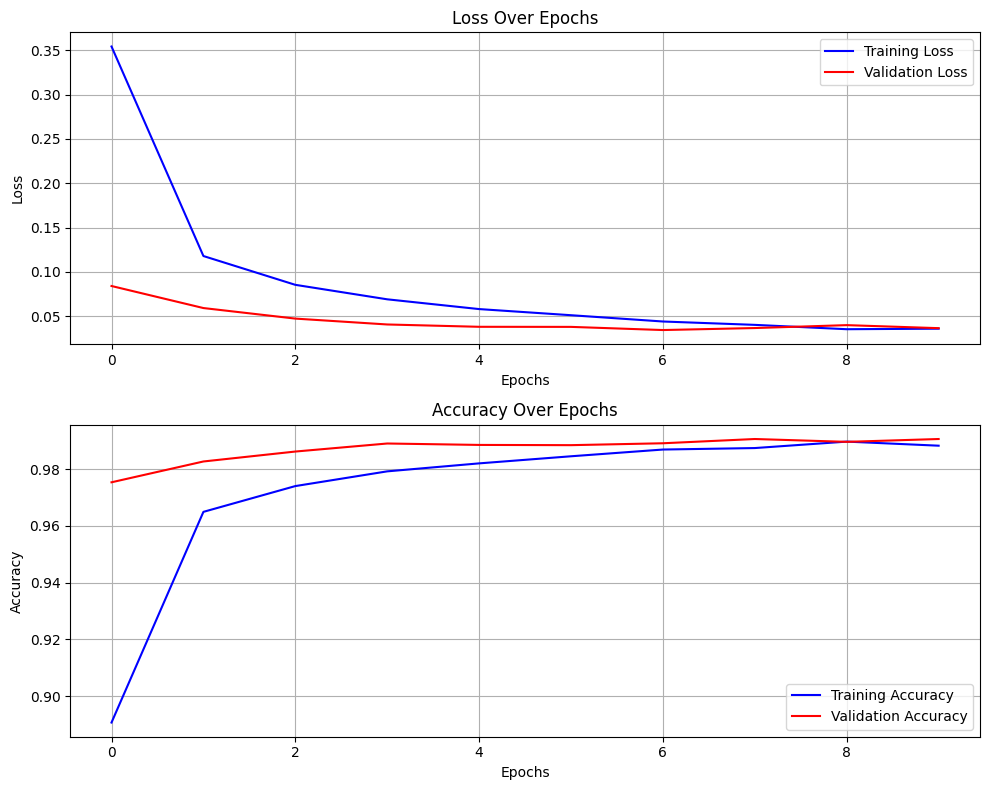

In [18]:
import matplotlib.pyplot as plt

# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# ----- LOSS -----
ax[0].plot(history.history['loss'], color='blue', label='Training Loss')
ax[0].plot(history.history['val_loss'], color='red', label='Validation Loss')
ax[0].set_title('Loss Over Epochs')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='best')
ax[0].grid(True)

# ----- ACCURACY -----
ax[1].plot(history.history['accuracy'], color='blue', label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], color='red', label='Validation Accuracy')
ax[1].set_title('Accuracy Over Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='best')
ax[1].grid(True)

plt.tight_layout()
plt.show()
